In [1]:
#importing librarys

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#reading data sets

df=pd.read_csv(r"C:\Users\udaya\OneDrive\Desktop\ML_algos\income.csv")

In [3]:
#showing head

df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


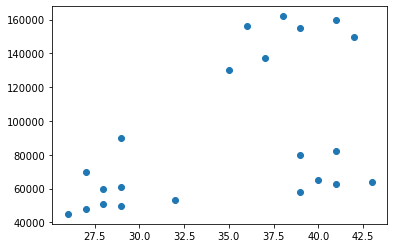

In [4]:
#ploting scatter plot

plt.scatter(df.Age,df["Income($)"])

Text(0, 0.5, 'Income($)')

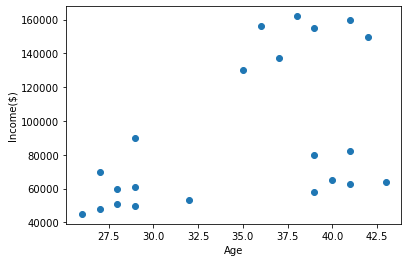

In [5]:
#sactter plot with labels

plt.scatter(df.Age,df["Income($)"])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [6]:
#training and fitting

km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
#merging cluster value with data frame

df['cluster']=y_predicted
df.head(6)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1


In [8]:
#showing centers

km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [9]:
#definig clusters with values 0,1,2

df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

No handles with labels found to put in legend.


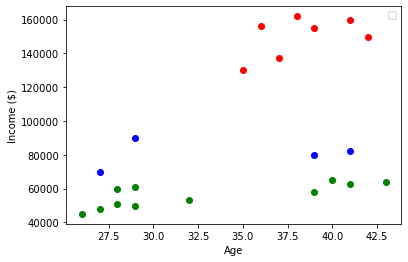

In [10]:
#ploting scatter plot with all data frames

plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df2.Age,df2['Income($)'],color="red")
plt.scatter(df3.Age,df3['Income($)'],color="blue")
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [11]:
# it gives a little bit wrong kind of prediction so lets scale it

In [12]:
#0-1 scale

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


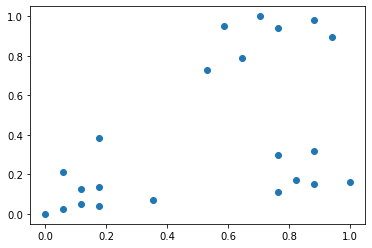

In [13]:
#ploting acatterplot for Kmeans

plt.scatter(df.Age,df["Income($)"])

In [14]:
#again train and predict
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [15]:
df['cluster']=y_predicted
df.head(6)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1


In [16]:
#showing centers
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [17]:
#defining data frames


df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

No handles with labels found to put in legend.


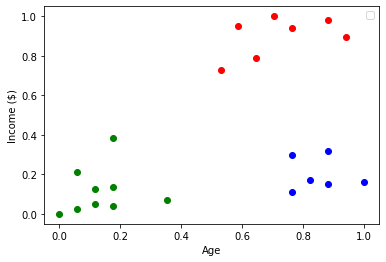

In [18]:
#ploting sactterplot for data frames

plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df2.Age,df2['Income($)'],color="red")
plt.scatter(df3.Age,df3['Income($)'],color="blue")
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

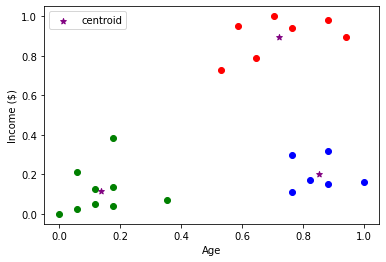

In [19]:
#ploting with showing centroid as  *

plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df2.Age,df2['Income($)'],color="red")
plt.scatter(df3.Age,df3['Income($)'],color="blue")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1]
            ,color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [20]:
#creating elbow plot

In [21]:
sse=[]

k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[["Age",'Income($)']])
    sse.append(km.inertia_)    

C:\Users\udaya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21055478995472496,
 0.1685851223602976,
 0.14090581089405507,
 0.10383752586603562]

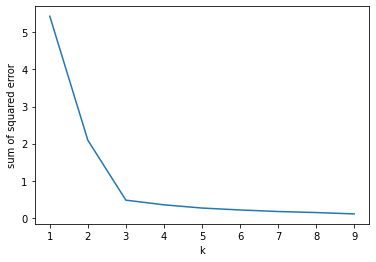

In [23]:
#elbow plot

plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)